In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy_financial as npf


# Simulation Monte-Carlo

le van est :  978329749.8505864
VAN moyen: -362559450.61998105
Variation du VAN moyen: -3746003.1799485274


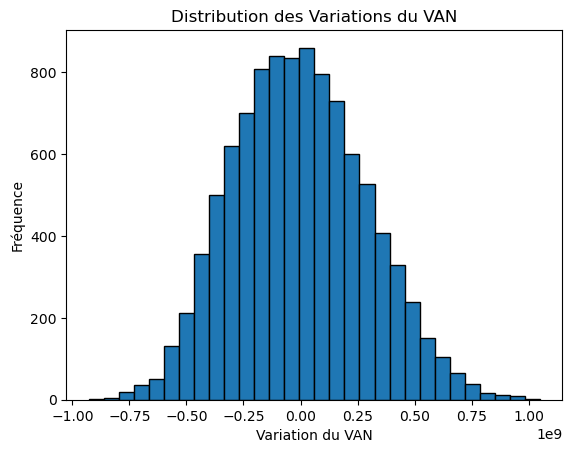

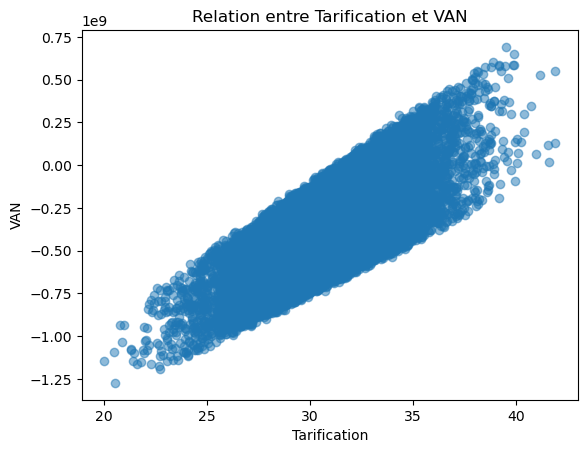

TRI moyen: -0.016832098865662715


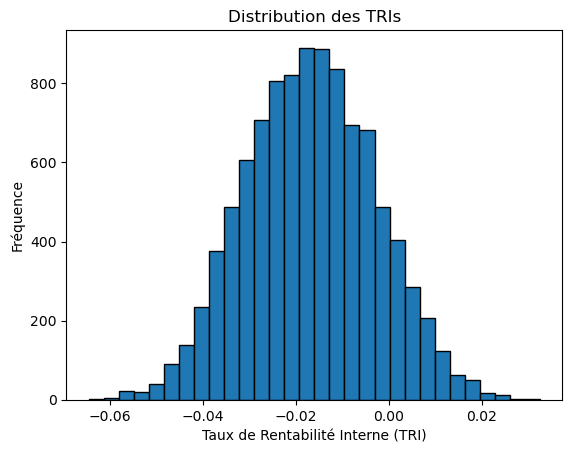

In [3]:

# Paramètres du projet
nombre_simulations = 10000
investissement_initial = 2580000000 # Montant initial investi
annees = 20  # Durée du projet
taux_actualisation = 0.05  # Taux d'actualisation
moyenne_tarification = 31  # Tarification moyenne

# Création d'une distribution de tarifications autour de la moyenne
ecart_type_tarification = 3.055
tarifications = np.random.normal(moyenne_tarification, ecart_type_tarification, nombre_simulations)
# Variation de tarification entre -15% et +15%
pourcentage_variation = np.random.uniform(-0.15, 0.15, nombre_simulations)
tarifications_variation = tarifications * (1 + pourcentage_variation)
nombre_utilisateures=[]

# Fonction pour calculer le VAN
def calcul_van(tarification):
    flux_de_caisse = [-investissement_initial]
    cash_flow = 0
    for an in range(1, annees+1):
        nombre_utilisateur = np.random.uniform(5500000, 6000000)
        nombre_utilisateures.append(nombre_utilisateur)
        cash_flow = cash_flow+nombre_utilisateur * tarification / ((1 + taux_actualisation) ** an)
    van = cash_flow - investissement_initial

    return van
print("le van est : " ,calcul_van(50))

# Calcul du VAN pour chaque tarification avec variation
vans = [calcul_van(tarif) for tarif in tarifications_variation]

# Variation du VAN par rapport à la tarification moyenne
variation_van = [van - calcul_van(moyenne_tarification) for van in vans]

# Affichage des résultats
print("VAN moyen:", np.mean(vans))
print("Variation du VAN moyen:", np.mean(variation_van))

# Plot de la distribution des variations du VAN
plt.hist(variation_van, bins=30, edgecolor='black')
plt.xlabel('Variation du VAN')
plt.ylabel('Fréquence')
plt.title('Distribution des Variations du VAN')
plt.show()
plt.scatter(tarifications, vans, alpha=0.5)
plt.xlabel('Tarification')
plt.ylabel('VAN')
plt.title('Relation entre Tarification et VAN')
plt.show()

#calcul du tri
tris = [npf.irr([-investissement_initial] + [nombre_utilisateur * tarification / ((1 + taux_actualisation) ** an) for an in range(1, annees+1)]) for nombre_utilisateur, tarification in zip(nombre_utilisateures, tarifications_variation)]

# Affichage du TRI moyen
print("TRI moyen:", np.mean(tris))

# Plot de la distribution des TRIs
plt.hist(tris, bins=30, edgecolor='black')
plt.xlabel('Taux de Rentabilité Interne (TRI)')
plt.ylabel('Fréquence')
plt.title('Distribution des TRIs')
plt.show()
#plot de l'impace de la subvention sur le VAN
